In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('preprocessed_dataset.csv')

In [3]:
df.head()

,id,dialect,text
0,1175358310087892992,IQ,لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,يعني هذا محسوب على البشر .. حيونه ووحشيه .. و...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين هل الغيبه اخ محمد


In [4]:
df.dialect.value_counts()

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

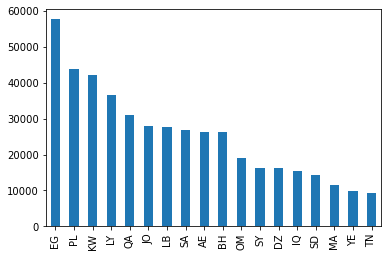

In [5]:
df.dialect.value_counts().plot.bar()
plt.show()

In [6]:
# df2 = df.sample(100000)

In [13]:
import numpy as np
Samplesize = 8000
df2 = df.groupby('dialect', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:])
df2.head()

id dialect  \
0 408395  1097060515636015232      AE   
  414426  1108650311135228032      AE   
  426167  1097904140116811776      AE   
  428170  1003345864876797952      AE   
  428090  1139858553211146240      AE   

                                                       text  
0 408395                       أجمل الناس من يتقبل كل نصيحه  
  414426   الله يرحمها  ويغمد روحها الجنه. كانت شاعره فذ...  
  426167    ولا بيتدخلون، بيقولون مالنا دخل في الموضوع، ...  
  428170  محتاج واحد ينسيني هم الدنيا وما فيها آه آه يلي...  
  428090   في حل ثاني\nتاخذ موتري\n\n\nوتدخل المواقف الم...

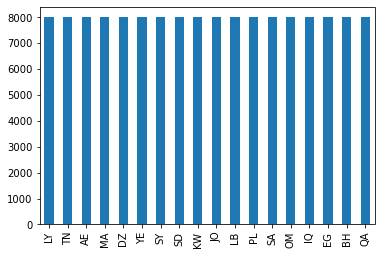

In [14]:
df2.dialect.value_counts().plot.bar()
plt.show()

In [15]:
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=10, 
                        norm='l2',
                        ngram_range=(1, 1))
features = tfidf.fit_transform(df2.text).toarray()
labels = df.dialect
features.shape

(144000, 19713)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['dialect'], test_size=0.3, random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [17]:
sample_id = 7

text = X_test.iloc[sample_id]
prediction = clf.predict(count_vect.transform([text]))[0]
print('text: '+text)
print('prediction: '+prediction)
print('true label: '+y_test.iloc[sample_id])

text: يا ريتني كنت من سكان قريته  
prediction: LY
true label: PL


In [18]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(count_vect.transform(X_test))
accuracy_score(y_test, y_pred)

0.4643287037037037

In [19]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['dialect'], test_size=0.3, random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [20]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(count_vect.transform(X_test))
accuracy_score(y_test, y_pred)

0.4572222222222222

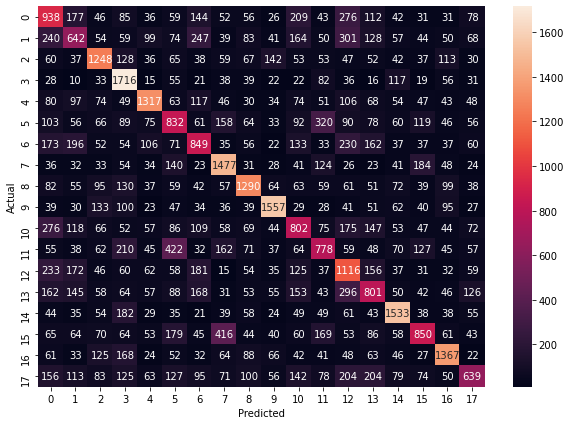

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
import joblib

joblib.dump(clf, 'dialect_svc')
joblib.dump(count_vect, 'dialect_vectorizer')

['dialect_vectorizer']